* -> Import Necessaries Things;

In [1]:
import os

In [2]:
!pip install tensorflow keras imutils
#-----------------------------------#
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import cv2
# this is the model we'll be using for  object detection
from tensorflow.keras.applications import Xception
# for preprocessing the input
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow

1. Read the image and Apply the selective search method of OpenCV

**->Read the input image of Sohel**
"""

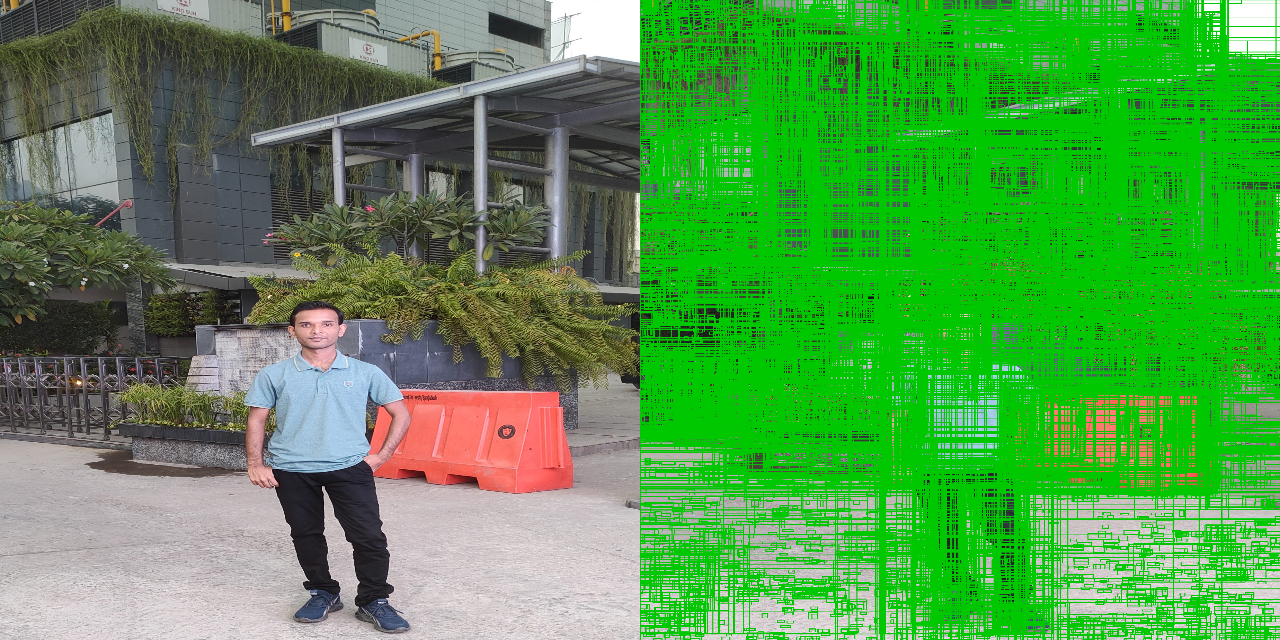

-1

In [4]:
# read the input image
img = cv2.imread('/content/IMG is not PIC.jpg')
 
# instanciate the selective search
# segmentation algorithm of opencv
search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
# set the base image as the input image
search.setBaseImage(img)
 
# since we'll use the fast method we set it as such
search.switchToSelectiveSearchFast()
 
# you can also use this for more accuracy:
# search.switchToSelectiveSearchQuality()
rects = search.process()  # process the image
 
roi = img.copy()
for (x, y, w, h) in rects:
 
    # Check if the width and height of
    # the ROI is atleast 10 percent
    # of the image dimensions and only then
    # show it
    if (w / float(w) < 0.1 or h / float(h) < 0.1):
        continue
 
    # Let's visualize all these ROIs
    cv2.rectangle(roi, (x, y), (x + w, y + h),
                  (0, 200, 0), 2)
 
roi = cv2.resize(roi, (640, 640))
final = cv2.hconcat([cv2.resize(img, (640, 640)), roi])
cv2_imshow(final)
cv2.waitKey(0)

*The complete implementation using Transformer Computer Vision Model**

**1. The input image of Group Photo**

In [5]:
img = cv2.imread('/content/102030405060708090-.jpg')

# instanciate the selective search
# segmentation algorithm of opencv
search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
# set the base image as the input image
search.setBaseImage(img)
search.switchToSelectiveSearchFast()
 
# you can also use this for more accuracy ->
# search.switchToSelectiveSearchQuality()
rects = search.process()  # process the image
 
rois = []
boxes = []
(H, W) = img.shape[:2]
for (x, y, w, h) in rects:
   
    # check if the ROI has atleast
    # 20% the size of our image
    if w / float(W) < 0.1 or h / float(H) < 0.1:
        continue
 
    # Extract the Roi from image
    roi = img[y:y + h, x:x + w]
     
    # Convert it to RGB format
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
     
    # Resize it to fit the input requirements of the model
    roi = cv2.resize(roi, (299, 299))
 
    # Further preprocessing
    roi = img_to_array(roi)
    roi = preprocess_input(roi)
 
    # Append it to our rois list
    rois.append(roi)
 
    # now let's store the box co-ordinates
    x1, y1, x2, y2 = x, y, x + w, y + h
    boxes.append((x1, y1, x2, y2))
 
# ------------ Model--------------- #
model = Xception(weights='imagenet')
 
 
# Convert ROIS list to arrays for predictions
input_array = np.array(rois)
print("Input array shape is ;", input_array.shape)
 
#---------- Make Predictions -------#
preds = model.predict(input_array)
preds = imagenet_utils.decode_predictions(preds, top=1)
 
 
# Initiate the dictionary
objects = {}
for (i, pred) in enumerate(preds):
   
    # extract the prediction tuple
    # and store it's values
    iD = pred[0][0]
    label = pred[0][1]
    prob = pred[0][2]
 
    if prob >= 0.9:
 
        # grab the bounding box associated
        # with the prediction and
        # convert the coordinates
        box = boxes[i]
 
        # create a tuble using box and probability
        value = objects.get(label, [])
         
        # append the value to the list for the label
        value.append((box, prob))
         
        # Add this tuple to the objects dictionary
        # that we initiated
        objects[label] = value
 
 
# Loop through the labels
# for each label apply the non_max_suppression
for label in objects.keys():
   
    # clone the original image so that we can
    # draw on it
    img_copy = img.copy()
    boxes = np.array([pred[0] for pred in objects[label]])
    proba = np.array([pred[1] for pred in objects[label]])
    boxes = non_max_suppression(boxes, proba)
 
    # Now unpack the co-ordinates of the bounding box
    (startX, startY, endX, endY) = boxes[0]
 
    # Draw the bounding box
    cv2.rectangle(img_copy, (startX, startY),
                  (endX, endY), (0, 255, 0), 2)
    y = startY - 10 if startY - 10 > 10 else startY + 10
 
    # Put the label on the image
    cv2.putText(img_copy, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0), 2)
 
    # Show the image
    cv2_imshow(img_copy)
    cv2.waitKey(0)

91884032/91884032 [==============================] - 1s 0us/step
Input array shape is ; (1203, 299, 299, 3)
35363/35363 [==============================] - 0s 0us/step


->"The input image of Rainy Day*

In [6]:
img = cv2.imread('/content/01.jpg')

# instanciate the selective search
# segmentation algorithm of opencv
search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
# set the base image as the input image
search.setBaseImage(img)
search.switchToSelectiveSearchFast()
 
# you can also use this for more accuracy ->
# search.switchToSelectiveSearchQuality()
rects = search.process()  # process the image
 
rois = []
boxes = []
(H, W) = img.shape[:2]
for (x, y, w, h) in rects:
   
    # check if the ROI has atleast
    # 20% the size of our image
    if w / float(W) < 0.1 or h / float(H) < 0.1:
        continue
 
    # Extract the Roi from image
    roi = img[y:y + h, x:x + w]
     
    # Convert it to RGB format
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
     
    # Resize it to fit the input requirements of the model
    roi = cv2.resize(roi, (299, 299))
 
    # Further preprocessing
    roi = img_to_array(roi)
    roi = preprocess_input(roi)
 
    # Append it to our rois list
    rois.append(roi)
 
    # now let's store the box co-ordinates
    x1, y1, x2, y2 = x, y, x + w, y + h
    boxes.append((x1, y1, x2, y2))
 
# ------------ Model--------------- #
model = Xception(weights='imagenet')
 
 
# Convert ROIS list to arrays for predictions
input_array = np.array(rois)
print("Input array shape is ;", input_array.shape)
 
#---------- Make Predictions -------#
preds = model.predict(input_array)
preds = imagenet_utils.decode_predictions(preds, top=1)
 
 
# Initiate the dictionary
objects = {}
for (i, pred) in enumerate(preds):
   
    # extract the prediction tuple
    # and store it's values
    iD = pred[0][0]
    label = pred[0][1]
    prob = pred[0][2]
 
    if prob >= 0.9:
 
        # grab the bounding box associated
        # with the prediction and
        # convert the coordinates
        box = boxes[i]
 
        # create a tuble using box and probability
        value = objects.get(label, [])
         
        # append the value to the list for the label
        value.append((box, prob))
         
        # Add this tuple to the objects dictionary
        # that we initiated
        objects[label] = value
 
 
# Loop through the labels
# for each label apply the non_max_suppression
for label in objects.keys():
   
    # clone the original image so that we can
    # draw on it
    img_copy = img.copy()
    boxes = np.array([pred[0] for pred in objects[label]])
    proba = np.array([pred[1] for pred in objects[label]])
    boxes = non_max_suppression(boxes, proba)
 
    # Now unpack the co-ordinates of the bounding box
    (startX, startY, endX, endY) = boxes[0]
 
    # Draw the bounding box
    cv2.rectangle(img_copy, (startX, startY),
                  (endX, endY), (0, 255, 0), 2)
    y = startY - 10 if startY - 10 > 10 else startY + 10
 
    # Put the label on the image
    cv2.putText(img_copy, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0), 2)
 
    # Show the image
    cv2_imshow(img_copy)
    cv2.waitKey(0)

Input array shape is ; (590, 299, 299, 3)
19/19 [==============================] - 6s 290ms/step


Input array shape is ; (798, 299, 299, 3)
25/25 [==============================] - 9s 327ms/step


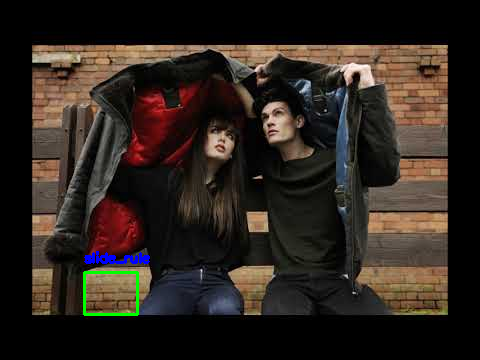

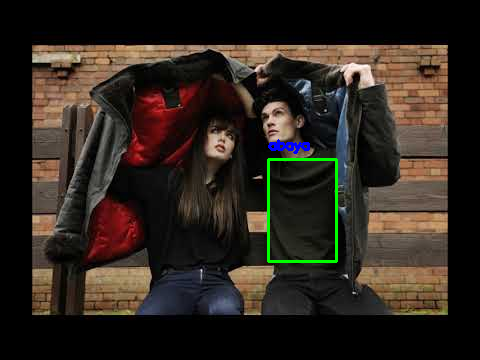

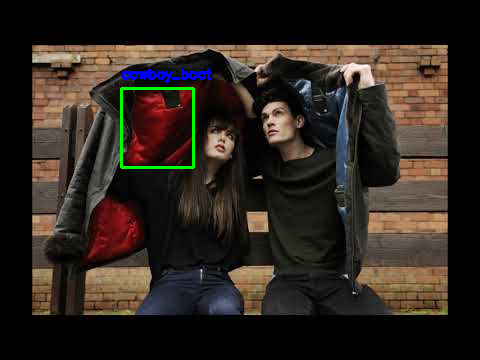

In [10]:
img = cv2.imread('/content/hqdefault.jpg')

# instanciate the selective search
# segmentation algorithm of opencv
search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
# set the base image as the input image
search.setBaseImage(img)
search.switchToSelectiveSearchFast()
 
# you can also use this for more accuracy ->
# search.switchToSelectiveSearchQuality()
rects = search.process()  # process the image
 
rois = []
boxes = []
(H, W) = img.shape[:2]
for (x, y, w, h) in rects:
   
    # check if the ROI has atleast
    # 20% the size of our image
    if w / float(W) < 0.1 or h / float(H) < 0.1:
        continue
 
    # Extract the Roi from image
    roi = img[y:y + h, x:x + w]
     
    # Convert it to RGB format
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
     
    # Resize it to fit the input requirements of the model
    roi = cv2.resize(roi, (299, 299))
 
    # Further preprocessing
    roi = img_to_array(roi)
    roi = preprocess_input(roi)
 
    # Append it to our rois list
    rois.append(roi)
 
    # now let's store the box co-ordinates
    x1, y1, x2, y2 = x, y, x + w, y + h
    boxes.append((x1, y1, x2, y2))
 
# ------------ Model--------------- #
model = Xception(weights='imagenet')
 
 
# Convert ROIS list to arrays for predictions
input_array = np.array(rois)
print("Input array shape is ;", input_array.shape)
 
#---------- Make Predictions -------#
preds = model.predict(input_array)
preds = imagenet_utils.decode_predictions(preds, top=1)
 
 
# Initiate the dictionary
objects = {}
for (i, pred) in enumerate(preds):
   
    # extract the prediction tuple
    # and store it's values
    iD = pred[0][0]
    label = pred[0][1]
    prob = pred[0][2]
 
    if prob >= 0.9:
 
        # grab the bounding box associated
        # with the prediction and
        # convert the coordinates
        box = boxes[i]
 
        # create a tuble using box and probability
        value = objects.get(label, [])
         
        # append the value to the list for the label
        value.append((box, prob))
         
        # Add this tuple to the objects dictionary
        # that we initiated
        objects[label] = value
 
 
# Loop through the labels
# for each label apply the non_max_suppression
for label in objects.keys():
   
    # clone the original image so that we can
    # draw on it
    img_copy = img.copy()
    boxes = np.array([pred[0] for pred in objects[label]])
    proba = np.array([pred[1] for pred in objects[label]])
    boxes = non_max_suppression(boxes, proba)
 
    # Now unpack the co-ordinates of the bounding box
    (startX, startY, endX, endY) = boxes[0]
 
    # Draw the bounding box
    cv2.rectangle(img_copy, (startX, startY),
                  (endX, endY), (0, 255, 0), 2)
    y = startY - 10 if startY - 10 > 10 else startY + 10
 
    # Put the label on the image
    cv2.putText(img_copy, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0), 2)
 
    # Show the image
    cv2_imshow(img_copy)
    cv2.waitKey(0)

In [ ]:
#